In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from vinzy_imgdata_importer import img_data_importer 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Flatten

In [2]:
X_data,Y_data,m = img_data_importer('D:\Git\Face-Recognition-Auto-Attendance-System\Data');

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Brijesh AH\AppData\Local\Temp\ipykernel_5304\3865779153.py:1: SyntaxWarning: invalid escape sequence '\G'
  X_data,Y_data,m = img_data_importer('D:\Git\Face-Recognition-Auto-Attendance-System\Data');


Generating, Shuffling & Mapping the Data...
OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in f

In [3]:
m

{'donald': 0, 'mickey': 1, 'minion': 2, 'olaf': 3, 'pooh': 4, 'pumba': 5}

<Axes: xlabel='count'>

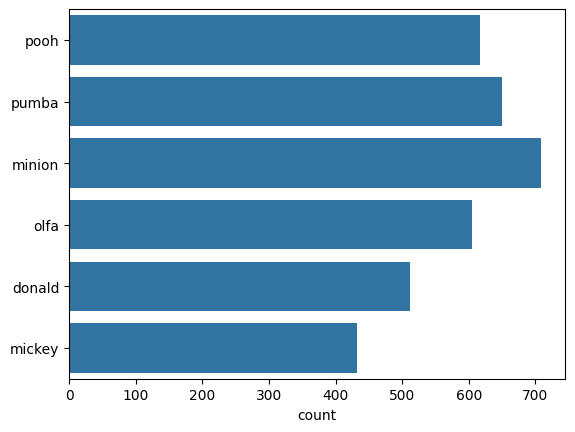

In [4]:
mappings = {0:'donald',1:'mickey',2:'minion',3:'olfa',4:'pooh',5:'pumba'}
Y_data_count = pd.Series(Y_data)
img_count = Y_data_count.map(mappings)
sns.countplot(img_count)

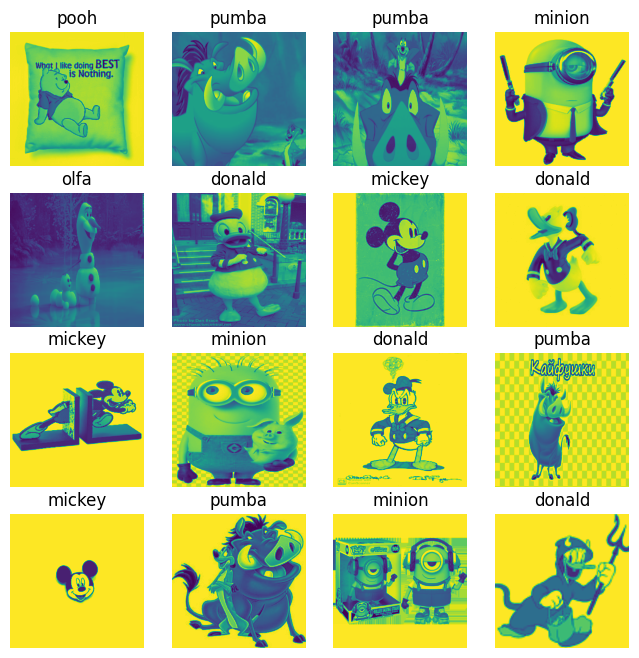

In [5]:
labels = ['donald','mickey','minion','olfa','pooh','pumba']
plt.figure(figsize=(8,8))
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_data[i])
    plt.title(labels[Y_data[i]])
    plt.axis('off')

In [6]:
X_data[0].shape

(300, 300, 1)

In [7]:
X_data.shape[0]

3521

In [8]:
X_train = X_data.reshape(X_data.shape[0],300,300,1)

In [9]:
Y_train = to_categorical(Y_data,num_classes=6)

In [10]:
cnn = Sequential([Conv2D(50,(2,2),activation='relu',input_shape=(300,300,1)),
                  MaxPooling2D(2,2),
                  Conv2D(50,(2,2),activation='relu',input_shape=(300,300,1)),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(20,activation='relu'),
                  Dense(40,activation='relu'),
                  Dense(6,activation='softmax')])

c:\Users\Brijesh AH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.compile(optimizer='adam', 
            loss="categorical_crossentropy", 
            metrics=['accuracy','precision', 'recall',])

In [12]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.2161 - loss: 2.0482 - precision: 0.2787 - recall: 0.0258
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.4899 - loss: 1.3627 - precision: 0.8065 - recall: 0.2099
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.7954 - loss: 0.6517 - precision: 0.8958 - recall: 0.6637
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9361 - loss: 0.2375 - precision: 0.9686 - recall: 0.8997
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9793 - loss: 0.0787 - precision: 0.9880 - recall: 0.9713
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9896 - loss: 0.0461 - precision: 0.9931 - recall: 0.9856
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.9973 - loss: 0.0199 - precision: 0.9983 - recall: 0.9960
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9923 - loss: 0.0309 - precision: 0.9954 - recall: 0.9900
Epoch 9/

In [28]:
for i in range(1000):
    a = X_data[i].reshape(1,300,300,1)
    prediction = cnn.predict(a)
    labels[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

(-0.5, 299.5, 299.5, -0.5)

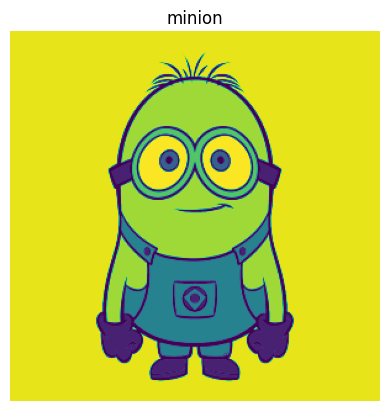

In [29]:
vi = 145
plt.imshow(X_data[vi])
plt.title(labels[Y_data[vi]])
plt.axis('off')

In [29]:
cnn.save('model.keras')